**Chaithra K C**

1. Introduction
2. Data preparation
    1. Load data
    2. Check for null and missing values
    3. Split training and valdiation set
3. Gaussian Naive Bayes Classifier
    1. Define the model
    2. Confusion Matrix
    2. Evaluate the model
4. Multinominal Naive Bayes Classifier 
    1. Define the model
    2. Confusion matrix
    3. Evaluate the model
5. Decision Trees 
    1. Define the model
    2. Confusion matrix
    3. Evaluate the model
6. Prediction and submition to Kaggle
    1. Predict and Submit results

#### 1. INTRODUCTION

The data set comes from the Kaggle Digit Recognizer competition. The goal is to recognize digits 0 to 9 in handwriting images.
We construct prediction models using naïve Bayes and decision tree algorithms. Tune their parameters to get the best model (measured by cross validation) and compare which algorithms provide better model for this task.

#### 2. DATA PREPARATION

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

#### 2.1 LOAD DATA

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((42000, 785), (28000, 784))

In [3]:
train.head() # vieweing first 5 rows to understand the dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2.2 CHECK FOR NULL OR NAN VALUES

<AxesSubplot:>

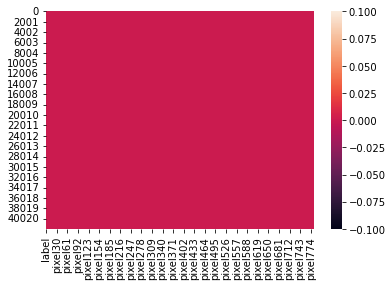

In [5]:
#sns.heatmap(train.isnull()) # no null or NA values in training data # resource intense 

<AxesSubplot:>

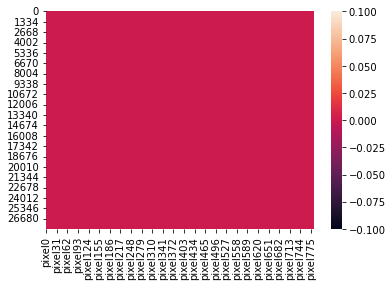

In [6]:
#sns.heatmap(test.isnull()) # no null or NA values in testing data # resource intense 

There are no Null or NA values present in the dataset of both train and test.

#### 2.3 SPLIT TRAINING AND VALIDATION SET 

C:\Users\Chaithra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

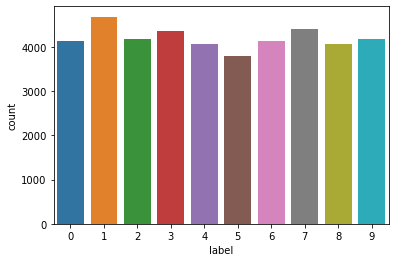

In [7]:
Y_train = train["label"]

# dropping the 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

g = sns.countplot(Y_train)

Y_train.value_counts()

We have similar counts for the 10 digits.

In [8]:
Y_train[0]

1


**We can get a better sense for one of these examples by visualising the image and looking at the label**

1


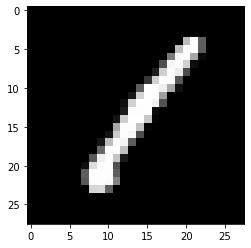

In [9]:
# visualizing the digits for few training example
print(Y_train[0])
training_example = X_train.iloc[0]
training_example = training_example.to_numpy() # converting series to numpy array
training_example = training_example.reshape((28,28)) # converting 1d array of pixels to 2d (28X28) pixels matrix
plt.imshow(training_example, cmap='gray')

8


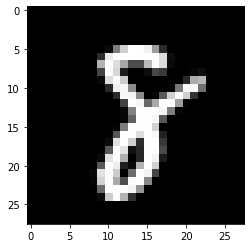

In [10]:
print(Y_train[300])
training_example = X_train.iloc[300]
training_example = training_example.to_numpy() # converting series to numpy array
training_example = training_example.reshape((28,28)) # converting 1d array of pixels to 2d (28X28) pixels matrix
plt.imshow(training_example, cmap='gray')

A small fraction (40%) became the validation set which the model is evaluated and the rest (60%) is used to train the model

In [11]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.4, random_state=30)

# Naive Bayes

In [12]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, Y_train)

GaussianNB()

In [13]:
# predict
nb_pred = gnb.predict(X_val)

nb_pred

array([6, 1, 9, ..., 0, 2, 0], dtype=int64)

In [14]:
# validating testing data
tab = pd.crosstab(Y_val, nb_pred, rownames=['Actual'],colnames=['Predicted'])
tab

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,1552,1,8,7,2,3,60,1,27,21
1,1,1813,2,10,1,1,19,0,33,18
2,185,56,394,265,13,10,425,3,284,29
3,98,92,9,1010,3,2,70,15,238,180
4,47,13,11,16,332,6,183,5,236,817
5,238,46,5,77,17,80,92,1,813,149
6,17,23,5,3,2,2,1553,0,30,2
7,8,12,1,28,12,2,11,573,49,1052
8,35,250,3,46,12,7,20,3,905,322


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

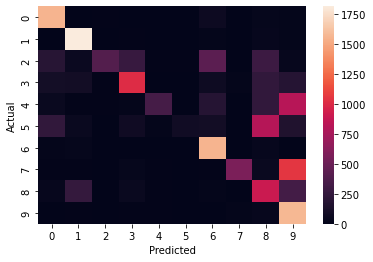

In [15]:
sns.heatmap(tab)

In [29]:
# Look at confusion matrix 
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

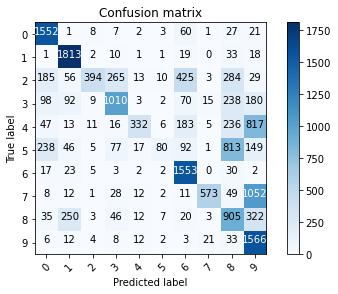

In [33]:
# compute the confusion matrix
confusion_gnb = confusion_matrix(Y_val, nb_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_gnb, classes = range(10)) 

In [16]:
print(classification_report(Y_val, nb_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80      1682
           1       0.78      0.96      0.86      1898
           2       0.89      0.24      0.37      1664
           3       0.69      0.59      0.63      1717
           4       0.82      0.20      0.32      1666
           5       0.70      0.05      0.10      1518
           6       0.64      0.95      0.76      1637
           7       0.92      0.33      0.48      1748
           8       0.34      0.56      0.43      1603
           9       0.38      0.94      0.54      1667

    accuracy                           0.58     16800
   macro avg       0.69      0.57      0.53     16800
weighted avg       0.69      0.58      0.54     16800



#### Accuracy of Gaussian Naive Bayes classifier is 0.58 which is very low. Reason for low accuracy might be due to the fact that GNB assumes features to be normally distributed. 

#### Naive Bayes Classifiers:

**(1) Bernoulli Naive Bayes** : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

**(2) Multinomial Naive Bayes** : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

**(3) Gaussian Naive Bayes** : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

```Based on the above information about the different classifiers, MultiNominal Naive Bayes might be appropriate to predict discrete data (digits 0-9) ```

External Reference - https://www.quora.com/What-is-the-difference-between-the-the-Gaussian-Bernoulli-Multinomial-and-the-regular-Naive-Bayes-algorithms


# Multinomial Naive Bayes

In [17]:
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train, Y_train)
pred_mnb = clf_mnb.predict(X_val)
pred_mnb

array([3, 1, 7, ..., 0, 2, 0], dtype=int64)

In [18]:
# validating testing data
tab_mnb = pd.crosstab(Y_val, pred_mnb, rownames=['Actual'],colnames=['Predicted'])
tab_mnb

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,1534,0,8,3,1,17,38,0,78,3
1,0,1780,13,10,1,6,9,1,71,7
2,24,25,1387,36,16,3,68,15,85,5
3,10,34,80,1381,4,32,20,10,86,60
4,3,7,8,0,1200,3,44,2,67,332
5,39,15,11,183,37,1024,33,2,134,40
6,15,30,7,1,7,37,1516,0,24,0
7,9,28,15,5,38,0,4,1448,45,156
8,7,79,18,81,27,67,8,7,1257,52


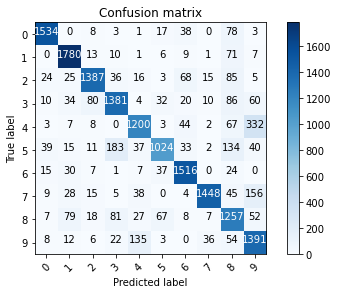

In [32]:
# compute the confusion matrix
confusion_mnb = confusion_matrix(Y_val, pred_mnb) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mnb, classes = range(10)) 

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

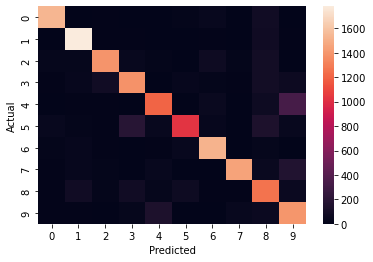

In [19]:
sns.heatmap(tab_mnb)

In [20]:
print(classification_report(Y_val, pred_mnb))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1682
           1       0.89      0.94      0.91      1898
           2       0.89      0.83      0.86      1664
           3       0.80      0.80      0.80      1717
           4       0.82      0.72      0.77      1666
           5       0.86      0.67      0.76      1518
           6       0.87      0.93      0.90      1637
           7       0.95      0.83      0.89      1748
           8       0.66      0.78      0.72      1603
           9       0.68      0.83      0.75      1667

    accuracy                           0.83     16800
   macro avg       0.84      0.83      0.83     16800
weighted avg       0.84      0.83      0.83     16800



##### 0.83 accuracy for Multinominal Naive Bayes Classifier

# Decision Trees

In [21]:
# training the model
clf = DecisionTreeClassifier(random_state=0, criterion='entropy') # entropy to measure the purity of the split 
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
# predicting on test data
dt_pred=clf.predict(X_val)
dt_pred

array([5, 1, 7, ..., 0, 2, 0], dtype=int64)

In [23]:
# validating testing data
tab_dt = pd.crosstab(Y_val, dt_pred, rownames=['Actual'],colnames=['Predicted'])
tab_dt

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,1541,0,19,13,14,17,34,7,24,13
1,0,1812,14,9,8,12,6,16,15,6
2,20,19,1369,39,28,23,52,42,47,25
3,11,18,55,1365,12,118,11,33,58,36
4,12,5,28,13,1385,13,29,25,35,121
5,25,18,21,85,24,1194,38,20,56,37
6,16,3,36,8,26,35,1465,2,37,9
7,2,16,36,34,24,12,2,1547,19,56
8,21,24,44,58,36,37,44,15,1286,38


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

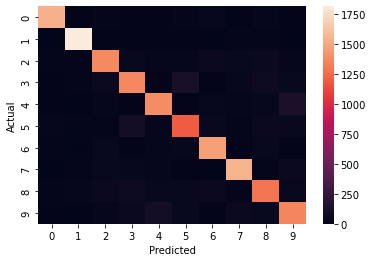

In [24]:
sns.heatmap(tab_dt)

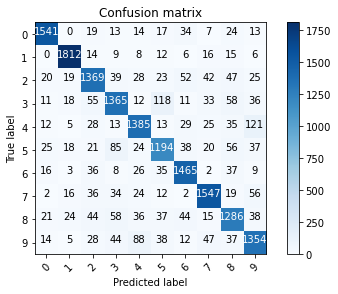

In [34]:
# compute the confusion matrix
confusion_dt = confusion_matrix(Y_val, dt_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_dt, classes = range(10)) 

In [25]:
print(classification_report(Y_val, dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1682
           1       0.94      0.95      0.95      1898
           2       0.83      0.82      0.83      1664
           3       0.82      0.79      0.81      1717
           4       0.84      0.83      0.84      1666
           5       0.80      0.79      0.79      1518
           6       0.87      0.89      0.88      1637
           7       0.88      0.89      0.88      1748
           8       0.80      0.80      0.80      1603
           9       0.80      0.81      0.81      1667

    accuracy                           0.85     16800
   macro avg       0.85      0.85      0.85     16800
weighted avg       0.85      0.85      0.85     16800



##### 0.85 accuracy for decision tree classifier

# PREDICT TEST DATA USING DECISION TREE CLASSIFIER

In [35]:
test_pred = clf.predict(test)
test_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [39]:
submission  = pd.DataFrame({'ImageId':pd.Series(range(1,test.shape[0]+1)),'Label':test_pred})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [40]:
submission.to_csv("decision_tree_mnist.csv",index=False)